In [1]:
#import some stuff
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wrangle import new_zillow, get_zillow_data, wrangle_zillow, split_zillow, remove_outliers
import sklearn.preprocessing

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution. 

In [2]:
# I chose to use the zillow data that I was already familiar with

df = wrangle_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648980 entries, 0 to 1648979
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    1648980 non-null  float64
 1   bathroomcnt                   1648980 non-null  float64
 2   calculatedfinishedsquarefeet  1648980 non-null  float64
 3   taxvaluedollarcnt             1648980 non-null  float64
 4   yearbuilt                     1648980 non-null  float64
 5   taxamount                     1648980 non-null  float64
 6   fips                          1648980 non-null  float64
dtypes: float64(7)
memory usage: 100.6 MB


In [4]:
#bring in our train, validate, and test sets
train, validate, test = split_zillow(df)

In [5]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
692498,3.0,2.0,1336.0,62801.0,1961.0,1267.10,6059.0
955814,3.0,2.0,1232.0,49408.0,1961.0,856.34,6059.0
459961,2.0,1.0,871.0,158119.0,1949.0,2128.86,6037.0
1059807,3.0,3.0,2679.0,532074.0,1938.0,5865.12,6037.0
36196,3.0,2.0,1528.0,210550.0,1931.0,2632.06,6037.0


<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='Count'>

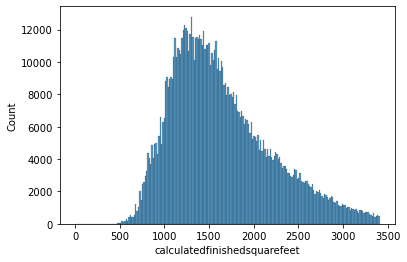

In [6]:
#checking our original train distributions
sns.histplot(data = train, x='calculatedfinishedsquarefeet')

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='Count'>

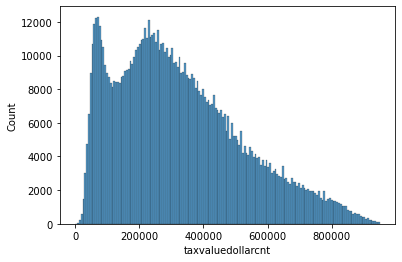

In [7]:
sns.histplot(data = train, x='taxvaluedollarcnt')

array([[<AxesSubplot:title={'center':'bedroomcnt'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>],
       [<AxesSubplot:title={'center':'taxvaluedollarcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'taxamount'}>],
       [<AxesSubplot:title={'center':'fips'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

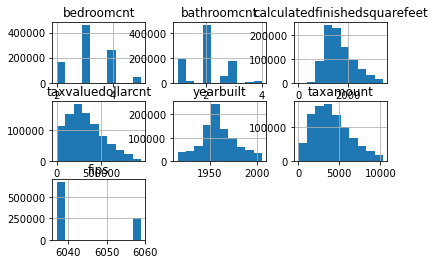

In [8]:
#quick overlook of the original train distributions
train.hist()

In [9]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [10]:
scaler.fit(train)

MinMaxScaler()

In [11]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [12]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [13]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.333333,0.333333,0.391496,0.066094,0.505495,0.121257,1.0
1,0.333333,0.333333,0.360997,0.051994,0.505495,0.081359,1.0
2,0.000000,0.000000,0.255132,0.166445,0.373626,0.204961,0.0
3,0.333333,0.666667,0.785337,0.560147,0.252747,0.567869,0.0
4,0.333333,0.333333,0.447801,0.221645,0.175824,0.253837,0.0


Text(0.5, 1.0, 'Scaled Bedroom count')

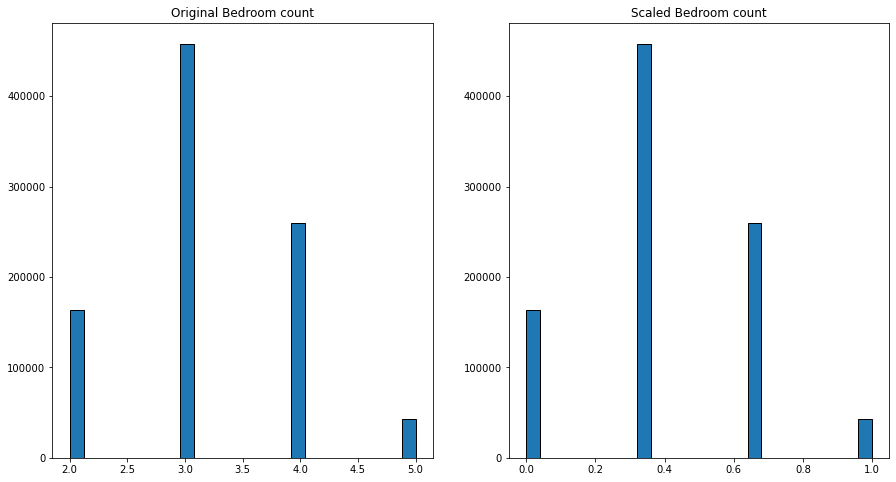

In [14]:
#MinMax
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bedroomcnt, bins=25, ec='black')
plt.title('Original Bedroom count')

plt.subplot(122)
plt.hist(train_scaled.bedroomcnt, bins=25, ec='black')
plt.title('Scaled Bedroom count')

Text(0.5, 1.0, 'Scaled Bathroom count')

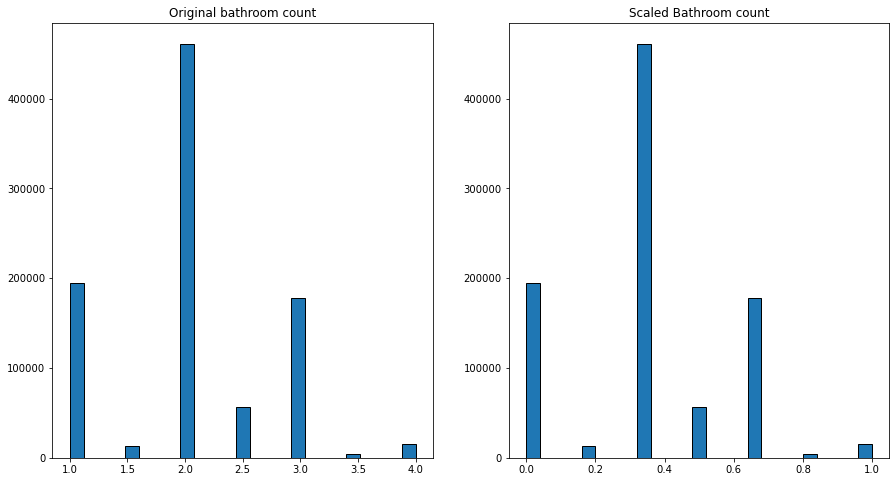

In [15]:
#MinMax
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bathroomcnt, bins=25, ec='black')
plt.title('Original bathroom count')

plt.subplot(122)
plt.hist(train_scaled.bathroomcnt, bins=25, ec='black')
plt.title('Scaled Bathroom count')

Text(0.5, 1.0, 'Scaled sq ft')

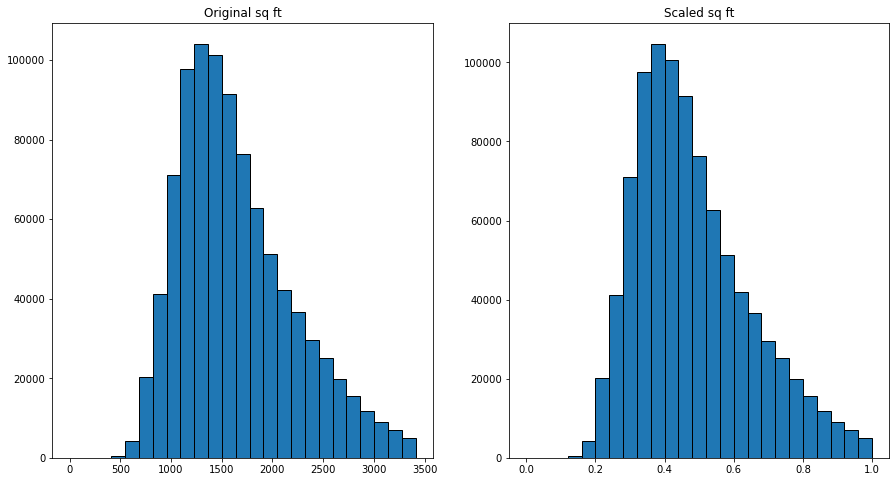

In [16]:
#MinMax
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original sq ft')

plt.subplot(122)
plt.hist(train_scaled.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled sq ft')

Text(0.5, 1.0, 'Scaled Tax')

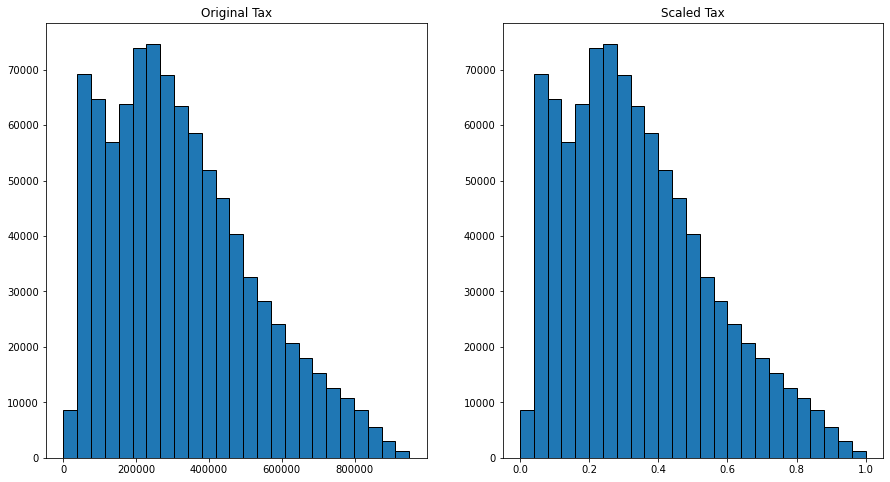

In [17]:
#MinMax
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Original Tax')

plt.subplot(122)
plt.hist(train_scaled.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Scaled Tax')

Text(0.5, 1.0, 'Scaled Year')

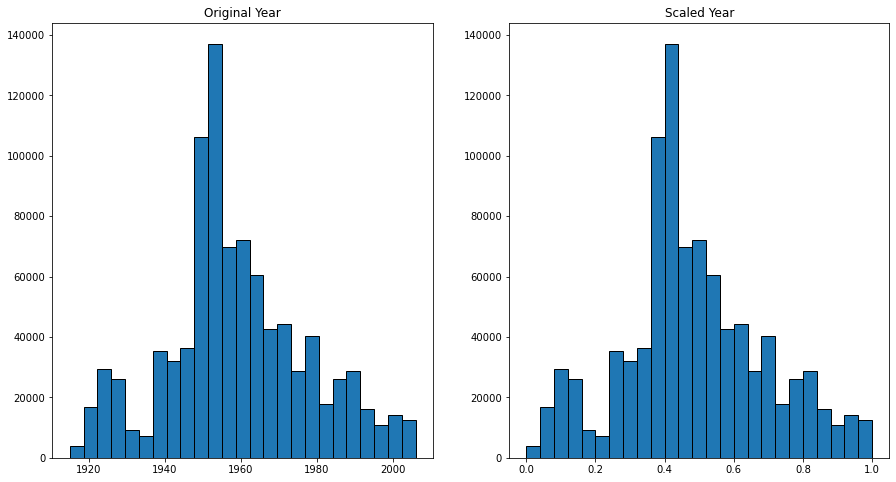

In [18]:
#MinMax
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.yearbuilt, bins=25, ec='black')
plt.title('Original Year')

plt.subplot(122)
plt.hist(train_scaled.yearbuilt, bins=25, ec='black')
plt.title('Scaled Year')

Text(0.5, 1.0, 'Scaled Tax')

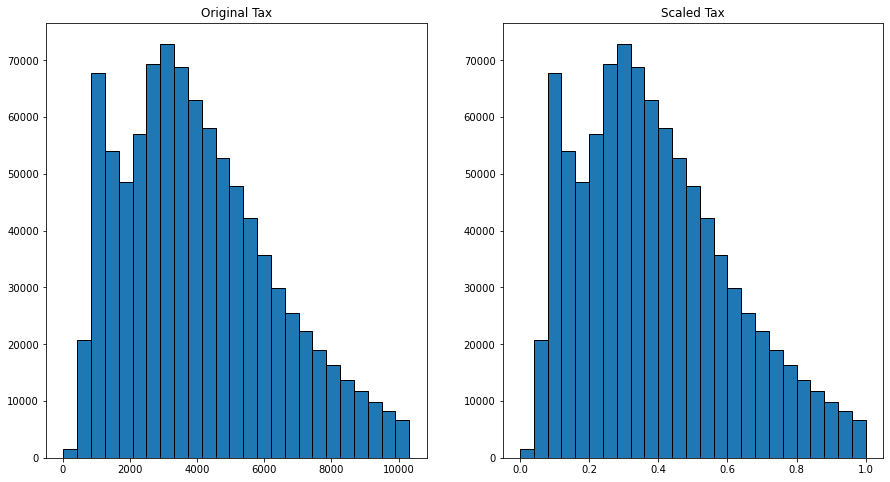

In [19]:
#MinMax
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original Tax')

plt.subplot(122)
plt.hist(train_scaled.taxamount, bins=25, ec='black')
plt.title('Scaled Tax')

Text(0.5, 1.0, 'Scaled fips')

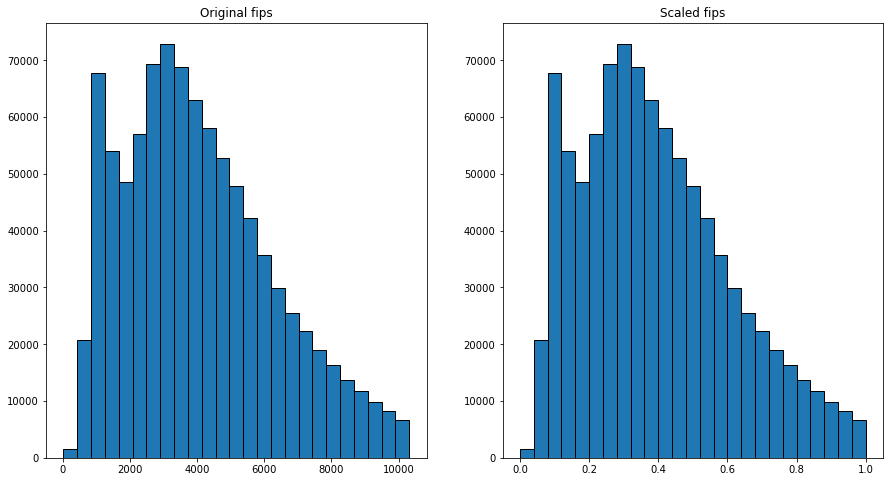

In [20]:
#MinMax
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original fips')

plt.subplot(122)
plt.hist(train_scaled.taxamount, bins=25, ec='black')
plt.title('Scaled fips')

Text(0.5, 1.0, 'Scaled')

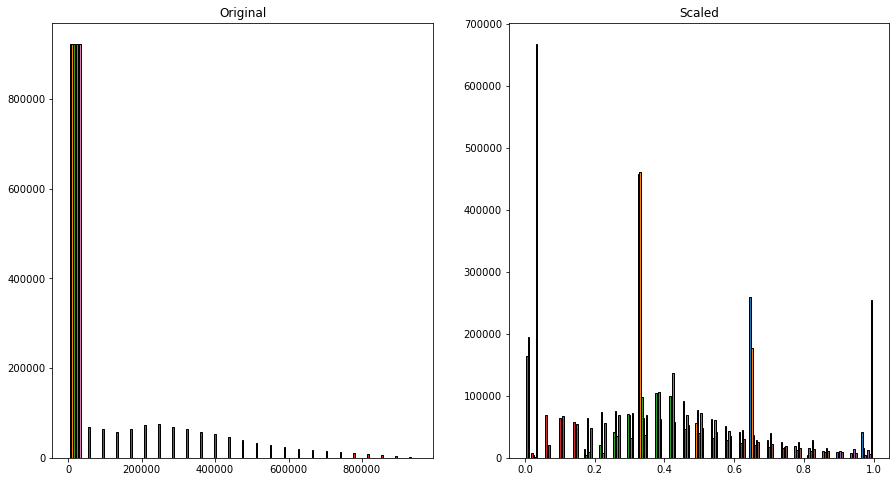

In [21]:
#MinMax
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

Standardization

In [22]:
scaler = sklearn.preprocessing.StandardScaler()

In [23]:
scaler.fit(train)

StandardScaler()

In [24]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [25]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [26]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,-0.252094,-0.065414,-0.543535,-1.327167,0.105740,-1.253514,1.617628
1,-0.252094,-0.065414,-0.729591,-1.394986,0.105740,-1.437961,1.617628
2,-1.539467,-1.481713,-1.375420,-0.844499,-0.536597,-0.866550,-0.618189
3,-0.252094,1.350886,1.859093,1.049122,-1.125406,0.811179,-0.618189
4,-0.252094,-0.065414,-0.200047,-0.579000,-1.500103,-0.640593,-0.618189


Text(0.5, 1.0, 'Scaled Bedroom count')

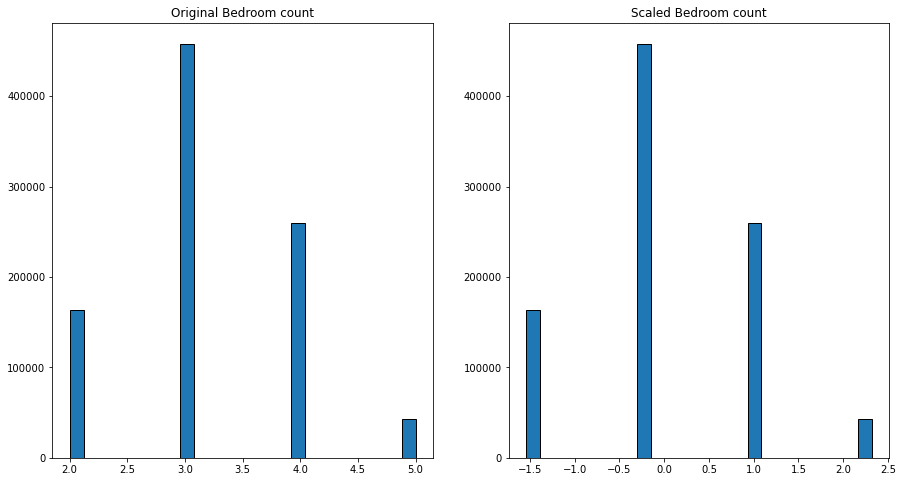

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bedroomcnt, bins=25, ec='black')
plt.title('Original Bedroom count')

plt.subplot(122)
plt.hist(train_scaled.bedroomcnt, bins=25, ec='black')
plt.title('Scaled Bedroom count')

Text(0.5, 1.0, 'Scaled Bathroom count')

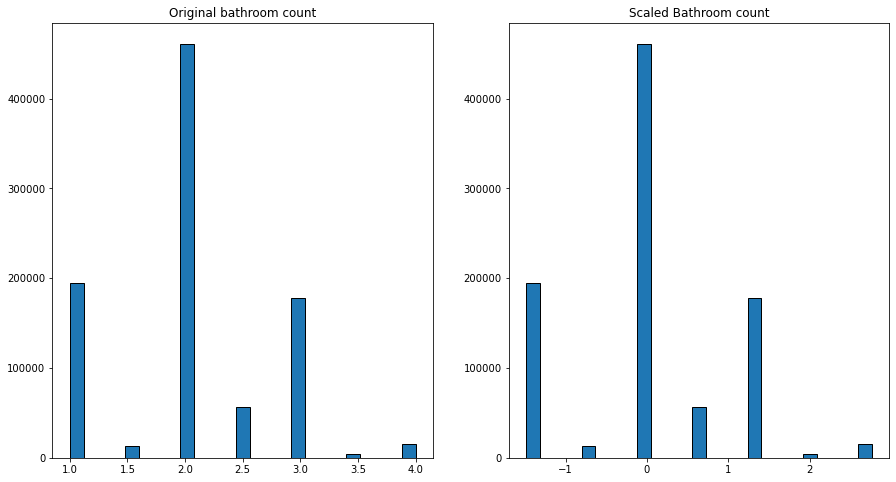

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bathroomcnt, bins=25, ec='black')
plt.title('Original bathroom count')

plt.subplot(122)
plt.hist(train_scaled.bathroomcnt, bins=25, ec='black')
plt.title('Scaled Bathroom count')

Text(0.5, 1.0, 'Scaled sq ft')

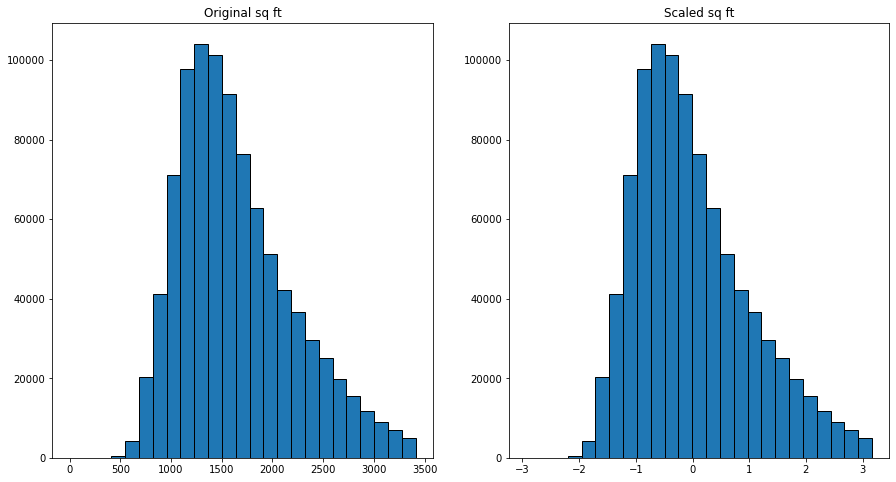

In [29]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original sq ft')

plt.subplot(122)
plt.hist(train_scaled.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled sq ft')

Text(0.5, 1.0, 'Scaled Tax')

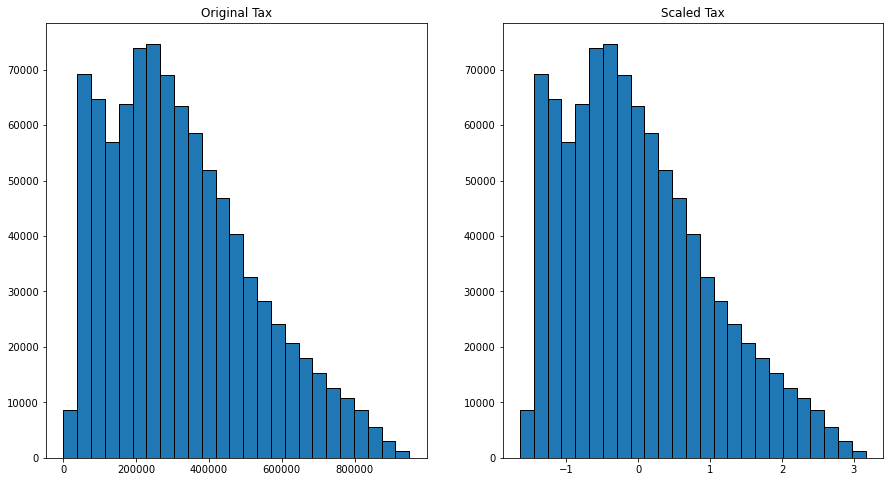

In [30]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Original Tax')

plt.subplot(122)
plt.hist(train_scaled.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Scaled Tax')

Text(0.5, 1.0, 'Scaled fips')

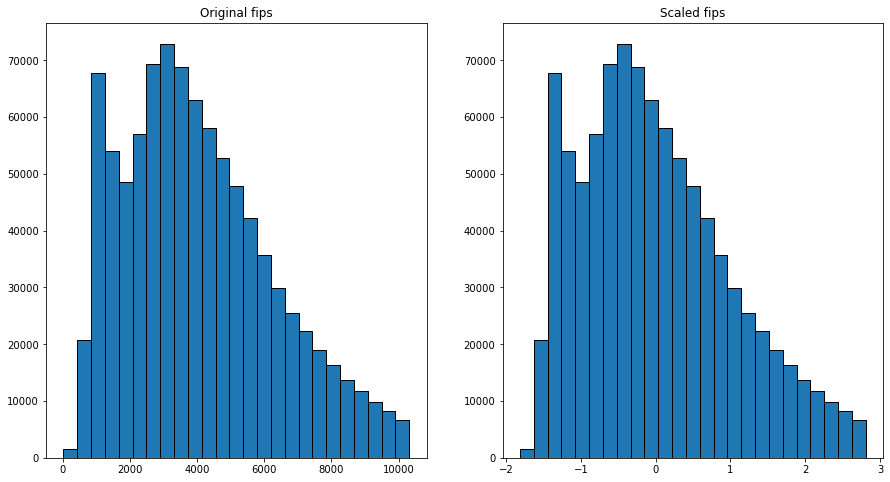

In [31]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original fips')

plt.subplot(122)
plt.hist(train_scaled.taxamount, bins=25, ec='black')
plt.title('Scaled fips')

Text(0.5, 1.0, 'Scaled')

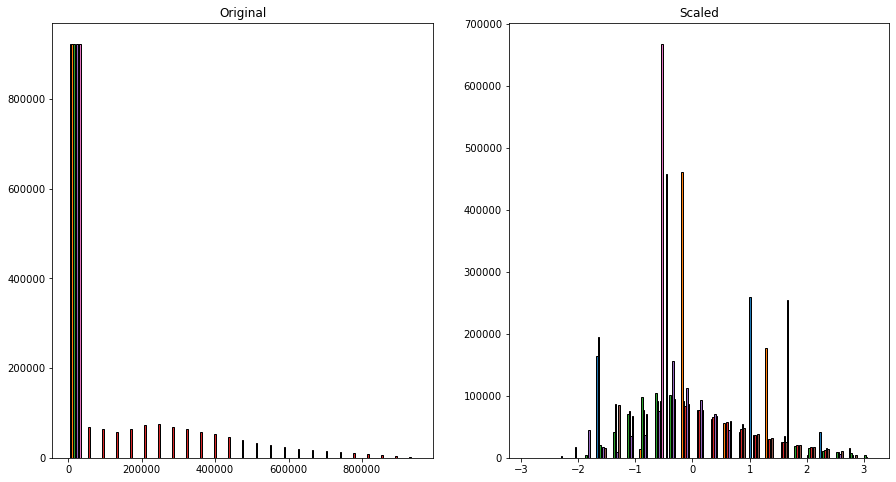

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

RobustScaler

In [33]:
scaler = sklearn.preprocessing.RobustScaler()

In [34]:
scaler.fit(train)

RobustScaler()

In [36]:
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

In [37]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

In [38]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,-0.266846,-0.834259,0.227273,-0.793550,1.0
1,0.0,0.0,-0.407008,-0.882798,0.227273,-0.925881,1.0
2,-1.0,-2.0,-0.893531,-0.488806,-0.318182,-0.515922,0.0
3,0.0,2.0,1.543127,0.866485,-0.818182,0.687764,0.0
4,0.0,0.0,-0.008086,-0.298785,-1.136364,-0.353810,0.0


Text(0.5, 1.0, 'Scaled Bedroom count')

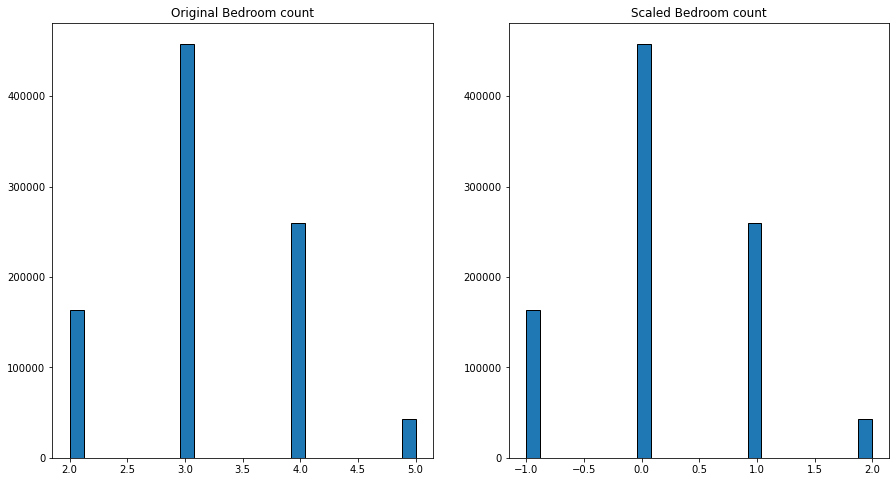

In [39]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bedroomcnt, bins=25, ec='black')
plt.title('Original Bedroom count')

plt.subplot(122)
plt.hist(train_scaled.bedroomcnt, bins=25, ec='black')
plt.title('Scaled Bedroom count')

Text(0.5, 1.0, 'Scaled Bathroom count')

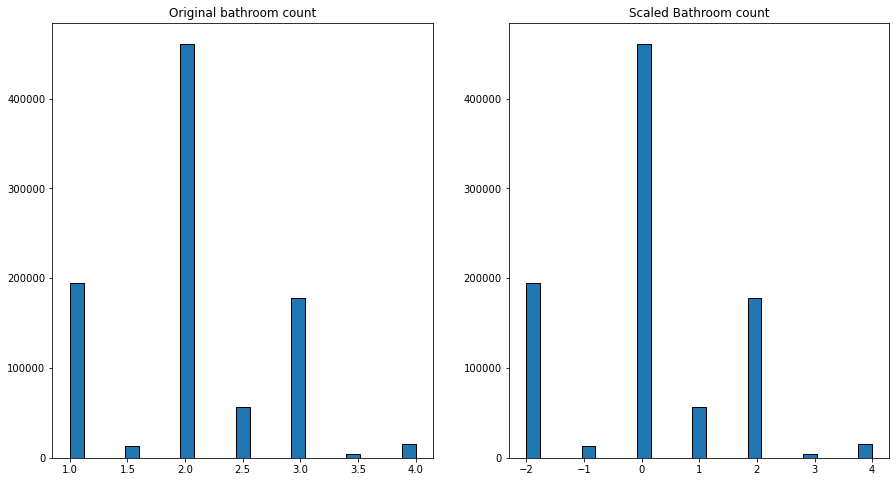

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bathroomcnt, bins=25, ec='black')
plt.title('Original bathroom count')

plt.subplot(122)
plt.hist(train_scaled.bathroomcnt, bins=25, ec='black')
plt.title('Scaled Bathroom count')

Text(0.5, 1.0, 'Scaled sq ft')

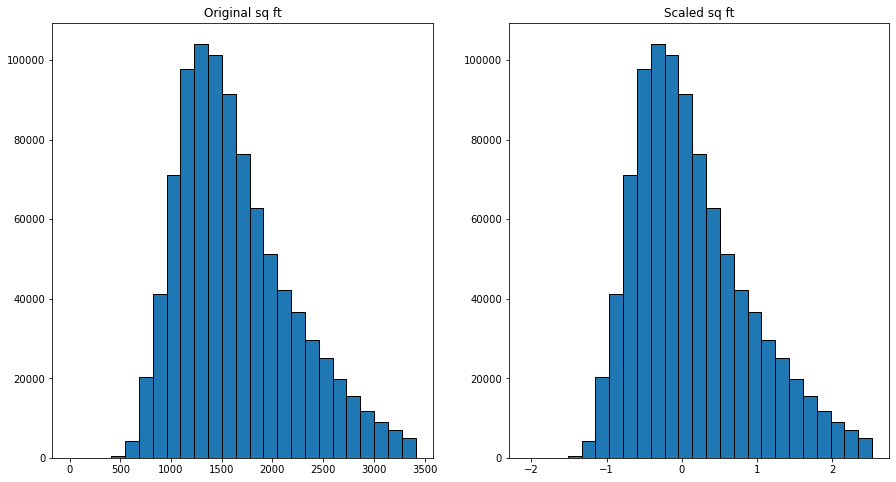

In [41]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original sq ft')

plt.subplot(122)
plt.hist(train_scaled.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled sq ft')

Text(0.5, 1.0, 'Scaled Tax')

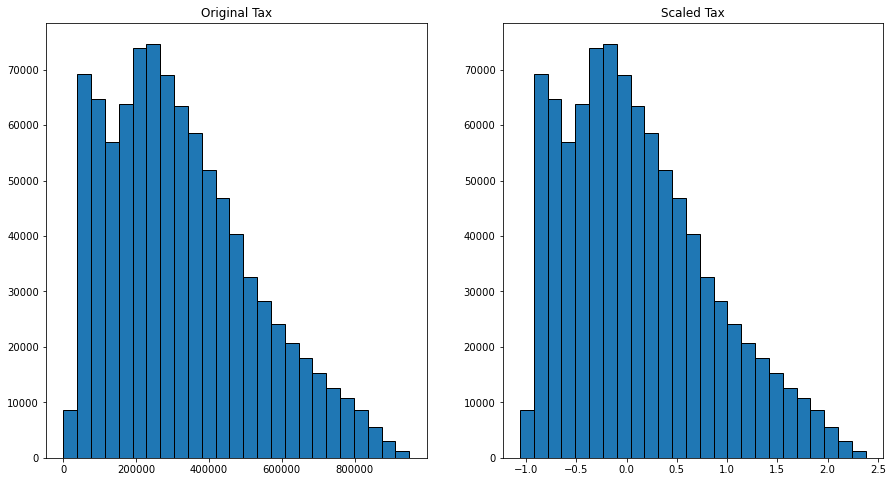

In [42]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Original Tax')

plt.subplot(122)
plt.hist(train_scaled.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Scaled Tax')

Text(0.5, 1.0, 'Scaled fips')

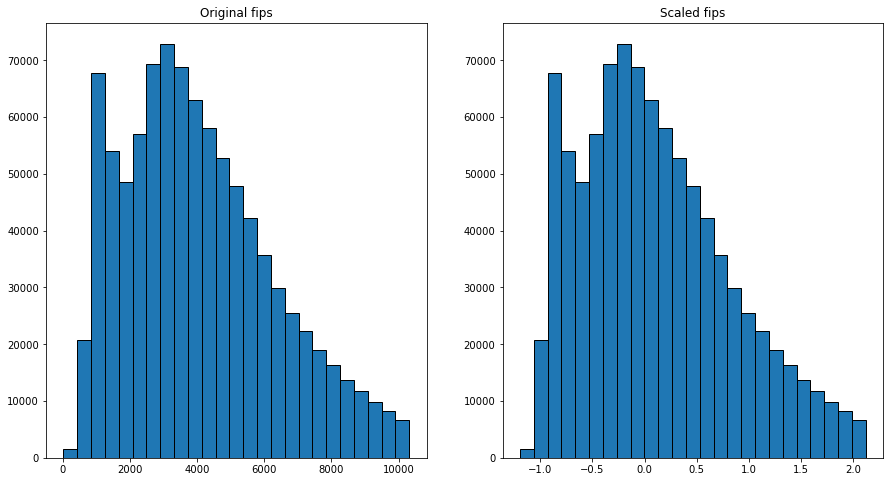

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original fips')

plt.subplot(122)
plt.hist(train_scaled.taxamount, bins=25, ec='black')
plt.title('Scaled fips')

Text(0.5, 1.0, 'Scaled')

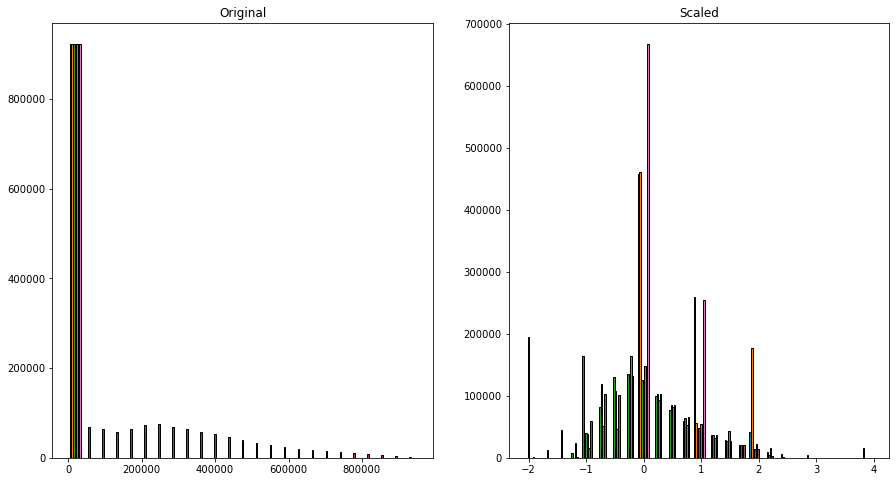

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [45]:
inverse_train = scaler.inverse_transform(train_scaled)

In [47]:
inverse_train = pd.DataFrame(inverse_train, index = train.index, columns = train.columns)

In [49]:
inverse_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,923428.0,3.195820,0.776776,2.00,3.00,3.00,4.000,5.00
bathroomcnt,923428.0,2.046186,0.706066,1.00,2.00,2.00,2.500,4.00
calculatedfinishedsquarefeet,923428.0,1639.820312,558.971549,1.00,1223.00,1534.00,1965.000,3411.00
taxvaluedollarcnt,923428.0,324891.809183,197481.573397,22.00,171377.75,292991.50,447300.000,949865.00
yearbuilt,923428.0,1959.024584,18.681789,1915.00,1949.00,1956.00,1971.000,2006.00
taxamount,923428.0,4058.644732,2226.976938,18.72,2362.86,3730.29,5466.875,10314.05
fips,923428.0,6043.082861,9.839809,6037.00,6037.00,6037.00,6059.000,6059.00


In [50]:
train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,923428.0,0.195820,0.776776,-1.000000,0.000000,0.0,1.000000,2.000000
bathroomcnt,923428.0,0.092373,1.412132,-2.000000,0.000000,0.0,1.000000,4.000000
calculatedfinishedsquarefeet,923428.0,0.142615,0.753331,-2.066038,-0.419137,0.0,0.580863,2.529650
taxvaluedollarcnt,923428.0,0.115613,0.715715,-1.061783,-0.440754,0.0,0.559246,2.380647
yearbuilt,923428.0,0.137481,0.849172,-1.863636,-0.318182,0.0,0.681818,2.272727
taxamount,923428.0,0.105784,0.717450,-1.195732,-0.440536,0.0,0.559464,2.121046
fips,923428.0,0.276494,0.447264,0.000000,0.000000,0.0,1.000000,1.000000


In [51]:
#MinMax with inverse transform does not return the same as the scaled data

Standardization

In [53]:
print(inverse_train.describe())
print(train_scaled.describe())

          bedroomcnt    bathroomcnt  calculatedfinishedsquarefeet  \
count  923428.000000  923428.000000                 923428.000000   
mean        3.195820       2.046186                   1639.820312   
std         0.776776       0.706066                    558.971549   
min         2.000000       1.000000                      1.000000   
25%         3.000000       2.000000                   1223.000000   
50%         3.000000       2.000000                   1534.000000   
75%         4.000000       2.500000                   1965.000000   
max         5.000000       4.000000                   3411.000000   

       taxvaluedollarcnt      yearbuilt      taxamount           fips  
count      923428.000000  923428.000000  923428.000000  923428.000000  
mean       324891.809183    1959.024584    4058.644732    6043.082861  
std        197481.573397      18.681789    2226.976938       9.839809  
min            22.000000    1915.000000      18.720000    6037.000000  
25%        171377.

Standardization with inverse transform does not return the same as scaled data

RobustScaler

In [54]:
print(inverse_train.describe())
print(train_scaled.describe())

          bedroomcnt    bathroomcnt  calculatedfinishedsquarefeet  \
count  923428.000000  923428.000000                 923428.000000   
mean        3.195820       2.046186                   1639.820312   
std         0.776776       0.706066                    558.971549   
min         2.000000       1.000000                      1.000000   
25%         3.000000       2.000000                   1223.000000   
50%         3.000000       2.000000                   1534.000000   
75%         4.000000       2.500000                   1965.000000   
max         5.000000       4.000000                   3411.000000   

       taxvaluedollarcnt      yearbuilt      taxamount           fips  
count      923428.000000  923428.000000  923428.000000  923428.000000  
mean       324891.809183    1959.024584    4058.644732    6043.082861  
std        197481.573397      18.681789    2226.976938       9.839809  
min            22.000000    1915.000000      18.720000    6037.000000  
25%        171377.

3.) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

In [55]:
qt = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

In [56]:
qt.fit_transform(train)

array([[-0.18931001, -0.06151264, -0.40335554, ...,  0.2561982 ,
        -1.29297898,  5.19933758],
       [-0.18931001, -0.06151264, -0.65337661, ...,  0.2561982 ,
        -1.94222966,  5.19933758],
       [-5.19933758, -5.19933758, -1.72468318, ..., -0.68317781,
        -0.78641012, -5.19933758],
       ...,
       [-5.19933758, -0.06151264, -0.4279759 , ...,  1.17438652,
         0.88875538,  5.19933758],
       [ 0.8901723 , -5.19933758,  0.08541442, ..., -0.48648036,
         0.51587333, -5.19933758],
       [ 0.8901723 , -0.06151264,  0.5505893 , ..., -0.75967739,
         0.37087363, -5.19933758]])

In [61]:
qt_train_scaled = qt.transform(train)
qt_validate_scaled = qt.transform(validate)
qt_test_scaled = qt.transform(test)

In [62]:
qt_train_scaled = pd.DataFrame(qt_train_scaled, columns=train.columns)
qt_validate_scaled = pd.DataFrame(qt_validate_scaled, columns=train.columns)
qt_test_scaled = pd.DataFrame(qt_test_scaled, columns=train.columns)

Text(0.5, 1.0, 'Scaled Bedroom count')

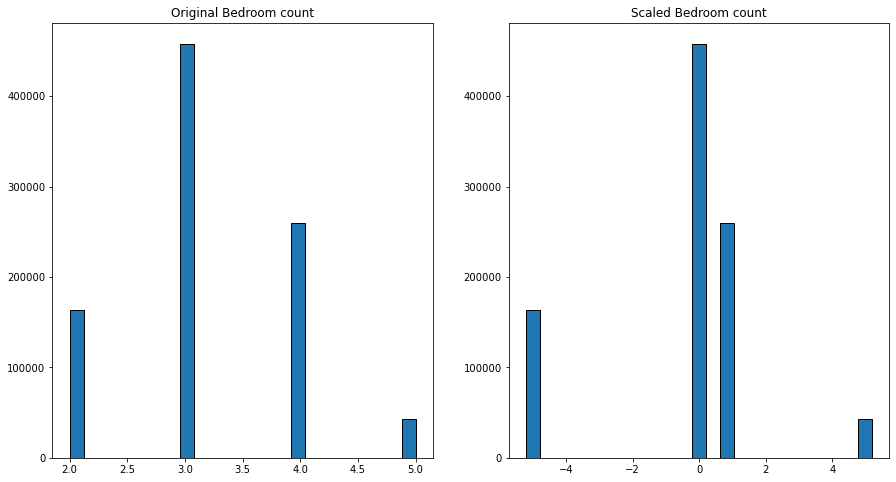

In [64]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bedroomcnt, bins=25, ec='black')
plt.title('Original Bedroom count')

plt.subplot(122)
plt.hist(qt_train_scaled.bedroomcnt, bins=25, ec='black')
plt.title('Scaled Bedroom count')

Text(0.5, 1.0, 'Scaled Bathroom count')

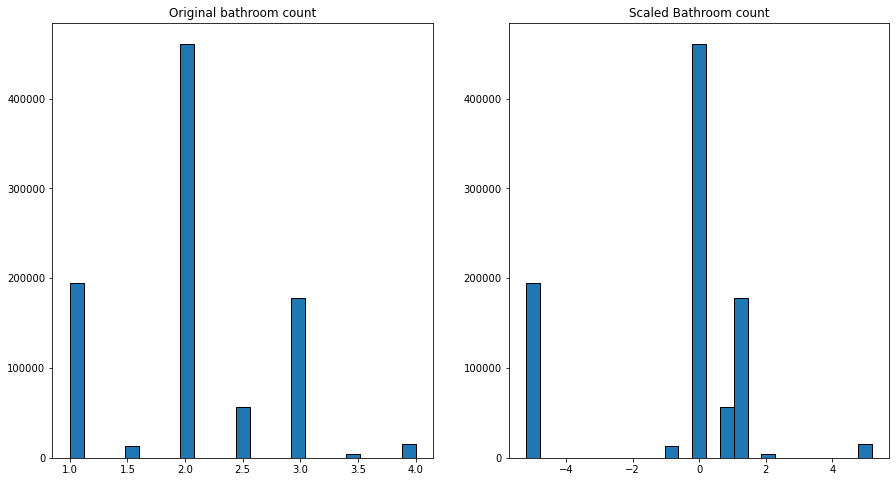

In [65]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bathroomcnt, bins=25, ec='black')
plt.title('Original bathroom count')

plt.subplot(122)
plt.hist(qt_train_scaled.bathroomcnt, bins=25, ec='black')
plt.title('Scaled Bathroom count')

Text(0.5, 1.0, 'Scaled sq ft')

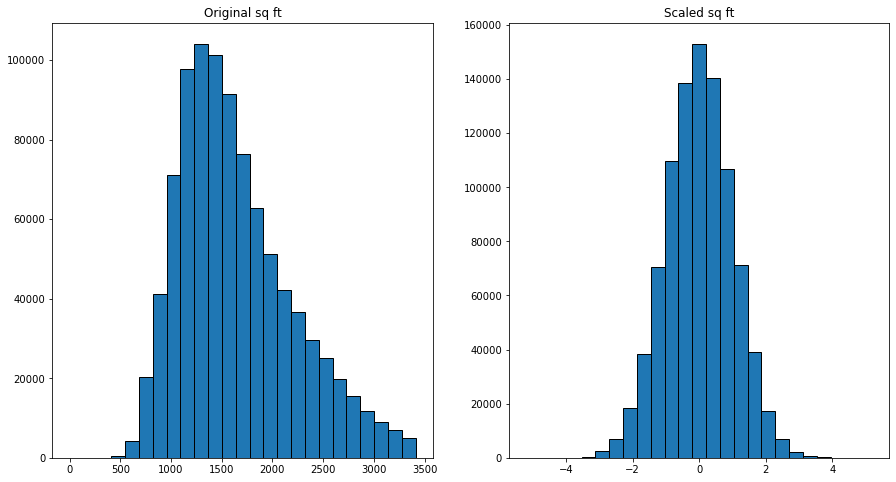

In [66]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original sq ft')

plt.subplot(122)
plt.hist(qt_train_scaled.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled sq ft')

Text(0.5, 1.0, 'Scaled Tax')

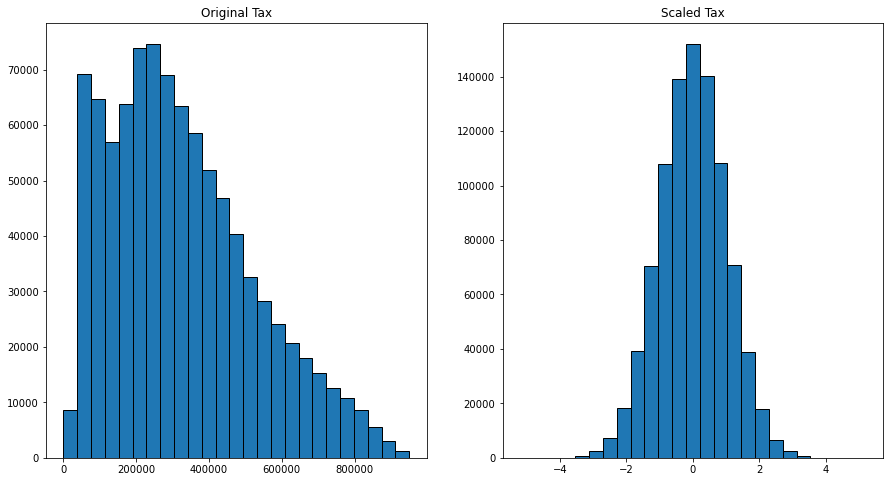

In [67]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Original Tax')

plt.subplot(122)
plt.hist(qt_train_scaled.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Scaled Tax')

Text(0.5, 1.0, 'Scaled fips')

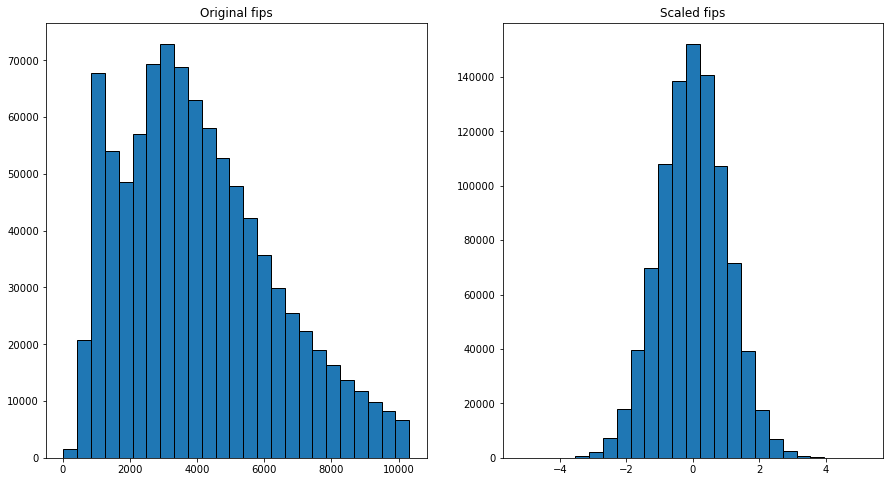

In [68]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original fips')

plt.subplot(122)
plt.hist(qt_train_scaled.taxamount, bins=25, ec='black')
plt.title('Scaled fips')

Text(0.5, 1.0, 'Scaled')

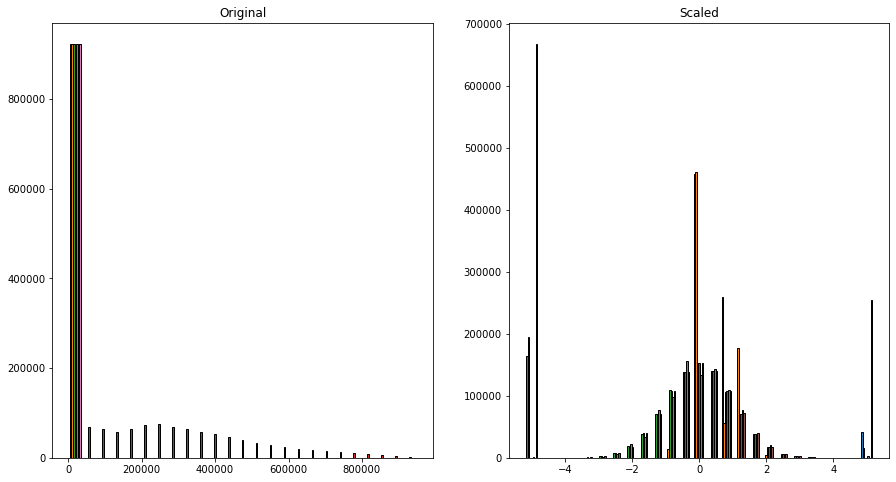

In [69]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

In [73]:
qt = sklearn.preprocessing.QuantileTransformer()

In [74]:
qt.fit_transform(train)

array([[0.42642643, 0.47697698, 0.34234234, ..., 0.6031031 , 0.1011099 ,
        1.        ],
       [0.42642643, 0.47697698, 0.25675676, ..., 0.6031031 , 0.02667335,
        1.        ],
       [0.        , 0.        , 0.04229229, ..., 0.24824825, 0.2168308 ,
        0.        ],
       ...,
       [0.        , 0.47697698, 0.33333333, ..., 0.87937938, 0.81063818,
        1.        ],
       [0.81431431, 0.        , 0.53353353, ..., 0.31331331, 0.69607227,
        0.        ],
       [0.81431431, 0.47697698, 0.70770771, ..., 0.22472472, 0.64434729,
        0.        ]])

In [75]:
qt_train_scaled = qt.transform(train)
qt_validate_scaled = qt.transform(validate)
qt_test_scaled = qt.transform(test)

In [76]:
qt_train_scaled = pd.DataFrame(qt_train_scaled, columns=train.columns)
qt_validate_scaled = pd.DataFrame(qt_validate_scaled, columns=train.columns)
qt_test_scaled = pd.DataFrame(qt_test_scaled, columns=train.columns)

Text(0.5, 1.0, 'Scaled Bedroom count')

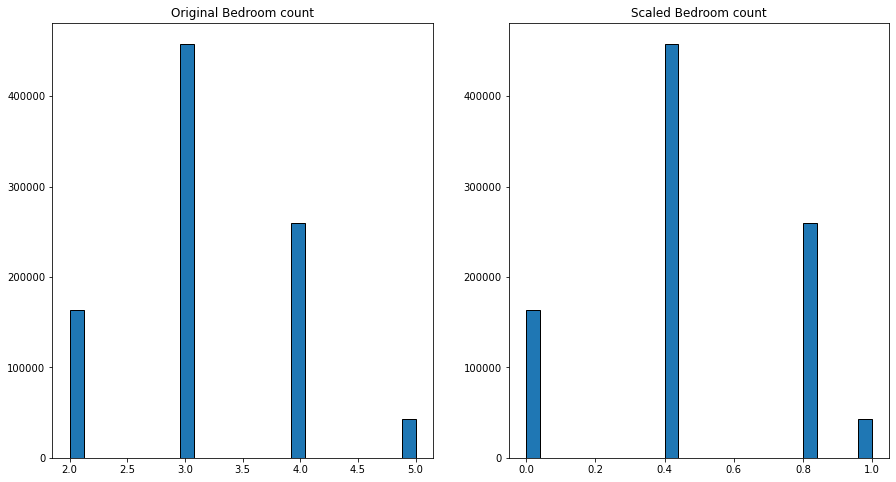

In [78]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bedroomcnt, bins=25, ec='black')
plt.title('Original Bedroom count')

plt.subplot(122)
plt.hist(qt_train_scaled.bedroomcnt, bins=25, ec='black')
plt.title('Scaled Bedroom count')

Text(0.5, 1.0, 'Scaled Bathroom count')

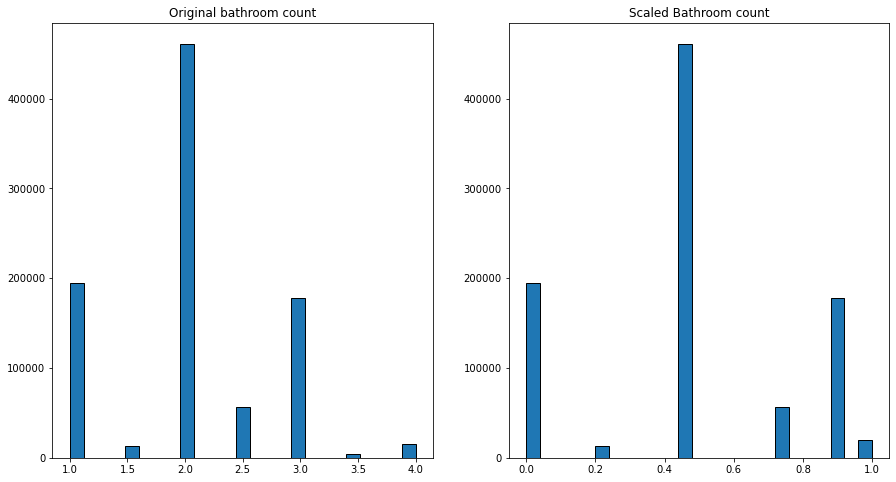

In [79]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.bathroomcnt, bins=25, ec='black')
plt.title('Original bathroom count')

plt.subplot(122)
plt.hist(qt_train_scaled.bathroomcnt, bins=25, ec='black')
plt.title('Scaled Bathroom count')

Text(0.5, 1.0, 'Scaled sq ft')

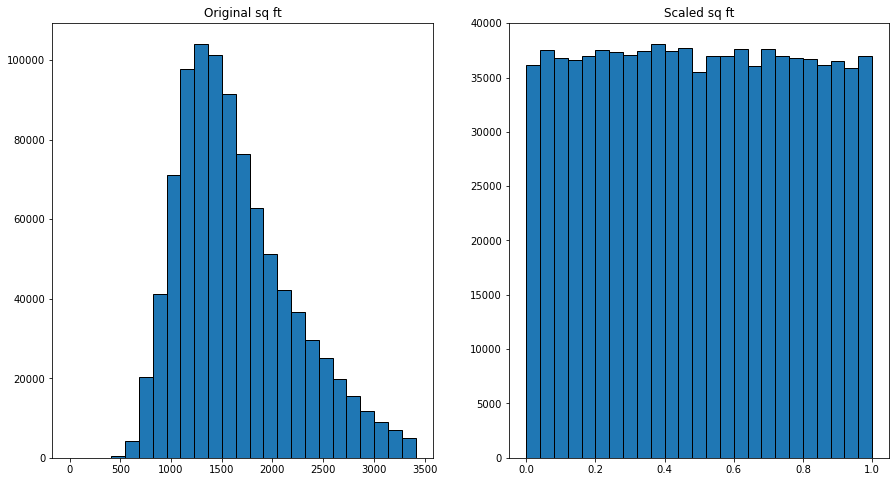

In [80]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Original sq ft')

plt.subplot(122)
plt.hist(qt_train_scaled.calculatedfinishedsquarefeet, bins=25, ec='black')
plt.title('Scaled sq ft')

Text(0.5, 1.0, 'Scaled Tax')

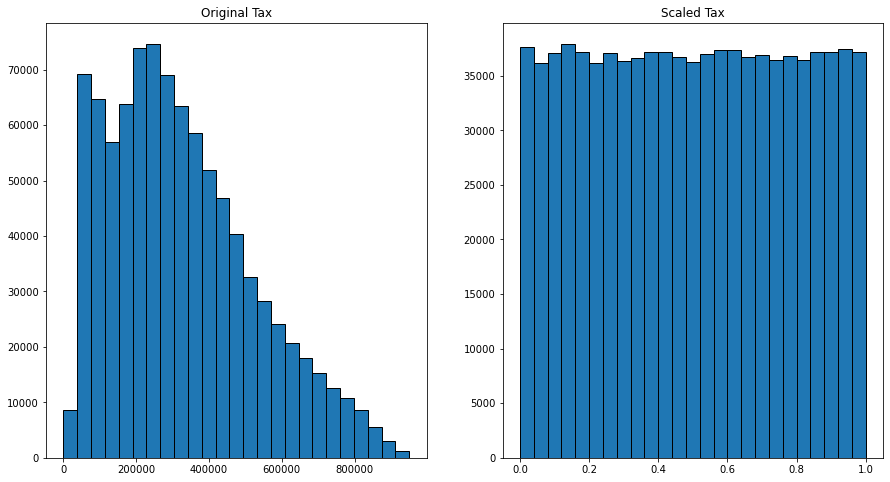

In [81]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Original Tax')

plt.subplot(122)
plt.hist(qt_train_scaled.taxvaluedollarcnt, bins=25, ec='black')
plt.title('Scaled Tax')

Text(0.5, 1.0, 'Scaled fips')

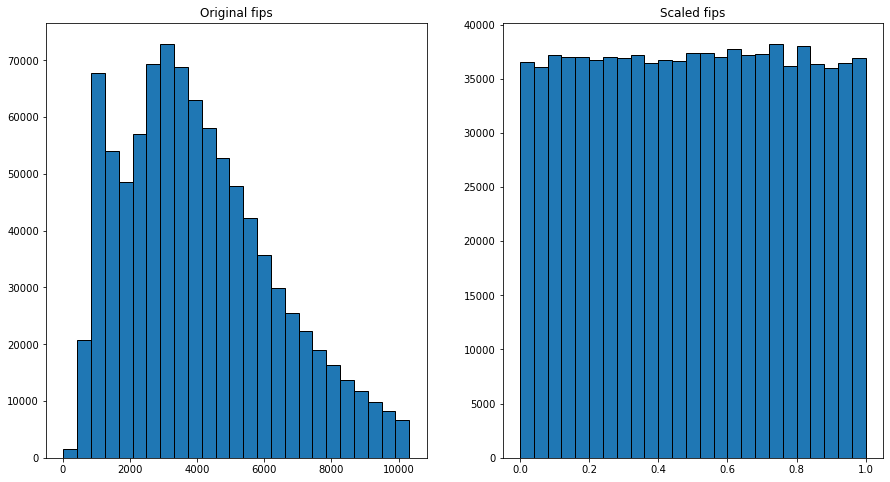

In [82]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train.taxamount, bins=25, ec='black')
plt.title('Original fips')

plt.subplot(122)
plt.hist(qt_train_scaled.taxamount, bins=25, ec='black')
plt.title('Scaled fips')

Text(0.5, 1.0, 'Scaled')

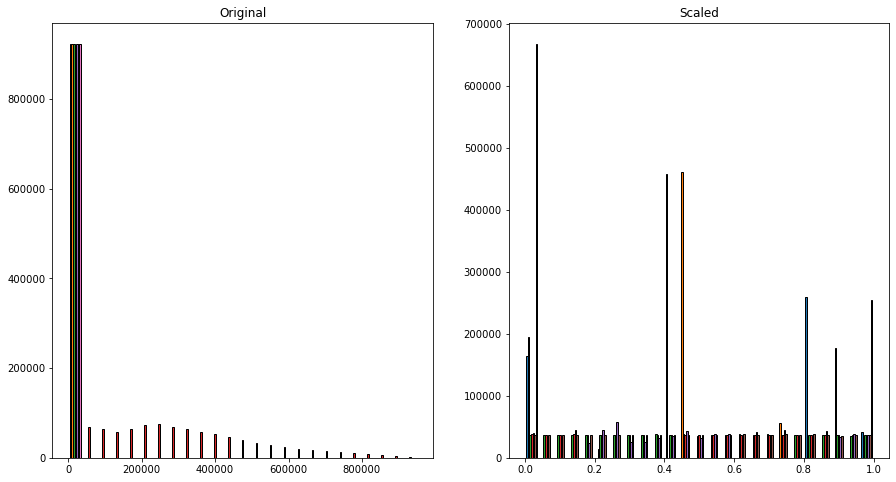

In [83]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')

plt.subplot(122)
plt.hist(qt_train_scaled, bins=25, ec='black')
plt.title('Scaled')

I notice the transformed graphs are on a smaller scale, as x only goes up to 1. It also appears evenly distributed.

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [84]:
def scale_data(train, validate, test):
    scaler = sklearn.preprocessing.MinMaxScaler()# use the min max scaler
    scaler.fit(train)# fit the thing 
    
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    
    train_scaled = pd.DataFrame(train_scaled, columns = train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns = train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns = train.columns)
    
    return train_scaled, validate_scaled, test_scaled

In [85]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [86]:
## make sure it works
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.333333,0.333333,0.391496,0.066094,0.505495,0.121257,1.0
1,0.333333,0.333333,0.360997,0.051994,0.505495,0.081359,1.0
2,0.000000,0.000000,0.255132,0.166445,0.373626,0.204961,0.0
3,0.333333,0.666667,0.785337,0.560147,0.252747,0.567869,0.0
4,0.333333,0.333333,0.447801,0.221645,0.175824,0.253837,0.0
